In [1]:
import numpy as np
import torch
import torchquantum as tq
from torchquantum.pulse import sigmax, sigmay, sigmaz, sigmaminus, sesolve, InitialState, mesolve
import matplotlib.pyplot as plt
from utils import *
from qutip import Bloch

In [100]:
n_dt = 160
dt = 0.22 # ns

In [120]:
rho0 = InitialDensity(n_qubit = 1, state = [1])
pulse = Schedule(0.3 * np.ones((n_dt,1)))
H = H_qubit_example(n_qubit = 1, pulse = pulse, dt = dt)

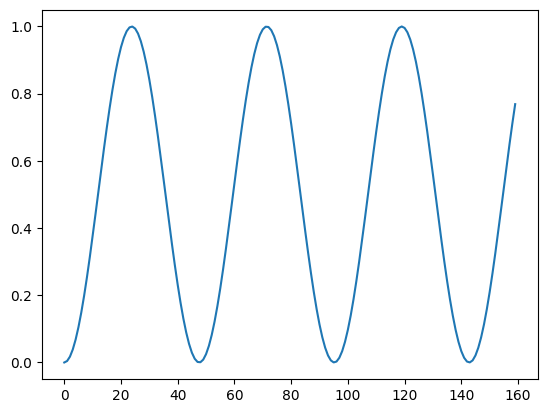

In [121]:
L_ops = None
y_res = mesolve(dens0 = rho0, H = H, n_dt = n_dt, dt = dt, L_ops = L_ops)
plt.plot([torch.diag(p)[0].item().real for p in y_res[0]])

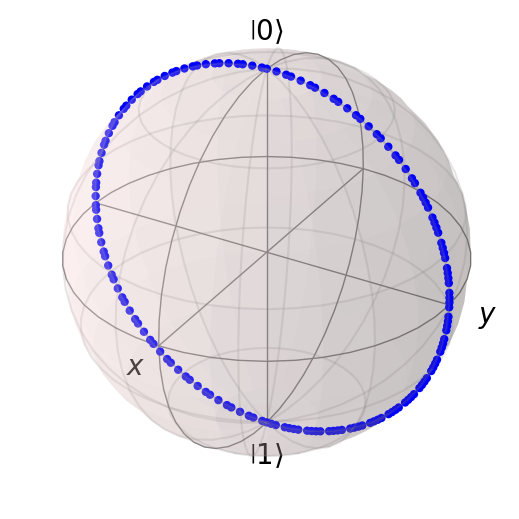

In [122]:
points = [dens2bloch(state) for state in y_res[0].tolist()]
sphere = Bloch()
sphere.add_points(np.array(points).T)
sphere.show()

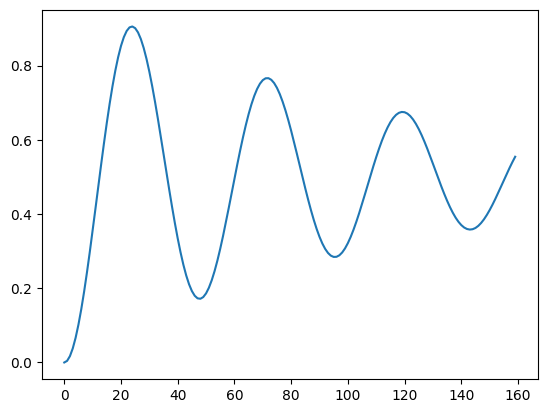

In [123]:
L_ops = 0.2 * sigmaz()
y_res = mesolve(dens0 = rho0, H = H, n_dt = n_dt, dt = dt, L_ops = L_ops)
plt.plot([torch.diag(p)[0].item().real for p in y_res[0]])

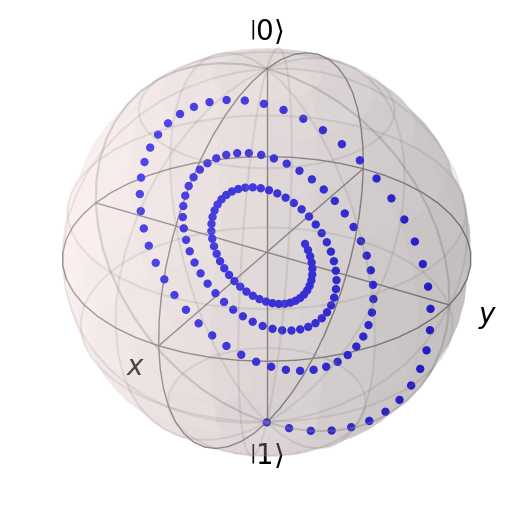

In [124]:
points = [dens2bloch(state) for state in y_res[0].tolist()]
sphere = Bloch()
sphere.add_points(np.array(points).T)
sphere.show()

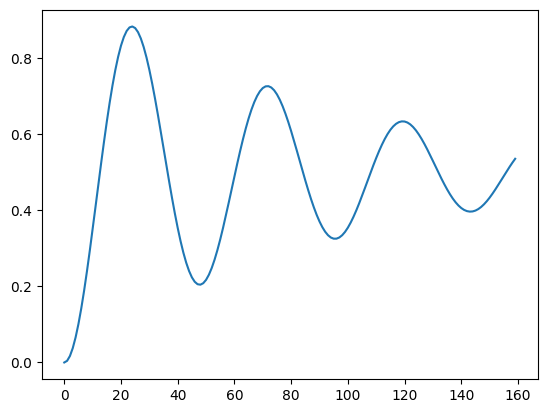

In [125]:
L_ops = 0.1 * sigmaminus() + 0.2 * sigmaz()
y_res = mesolve(dens0 = rho0, H = H, n_dt = n_dt, dt = dt, L_ops = L_ops)
plt.plot([torch.diag(p)[0].item().real for p in y_res[0]])

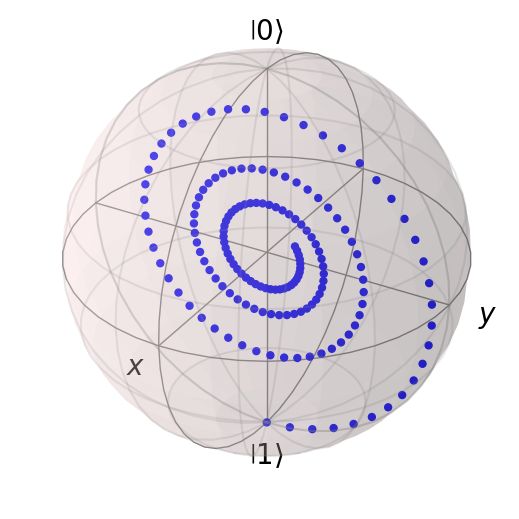

In [126]:
points = [dens2bloch(state) for state in y_res[0].tolist()]
sphere = Bloch()
sphere.add_points(np.array(points).T)
sphere.show()